## Main Question  
Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed!  
The investment would only make sense, if they can get more than 1 million monthly users with in next 18 months.  
In order to help Unicorn Ventures in their decision, **we need to forecast the traffic on JetRail for the next 7 months**.  
We are provided with traffic data of JetRail since inception in the test file. 

### Data Understanding  
#### Hypothesis Generation
Hypothesis generation is done before having a look at the data in order to avoid any bias that may result after the observation. 

Hypothesis generation helps us to point out the factors which might affect our dependent variable.  

Below are some of the hypotheses which I think can affect the passenger count (dependent variable for this time series problem) on the JetRail:  

1. There will be an increase in the traffic as the years pass by.  
**Explanation** - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail. 
2. The traffic will be high from May to October.  
**Explanation** - Tourist visits generally increases during this time period.  
3. Traffic on weekdays will be more as compared to weekends/holidays.  
**Explanation** - People will go to office on weekdays and hence the traffic will be more.  
4. Traffic during the peak hours will be high.   
**Explanation** - People will travel to work, college.

Let's now validate each of these hypotheses based on the dataset.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv("Datasets/Train_JetRail.csv")
test_set = pd.read_csv("Datasets/Test_JetRail.csv")

In [3]:
# Making copy of each set, just-in-case
train_set_original = train_set.copy()
test_set_original = test_set.copy()

In [4]:
train_set.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


1. **ID** is the unique number given to each observation point. 
2. **Datetime** is the time of each observation. 
3. **Count** is the passenger count corresponding to each Datetime.

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [6]:
test_set.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


**We have to predict the 'Count' for the test file.**

In [7]:
print("Train Set Shape: ", train_set.shape)
print("Test Set Shape: ", test_set.shape)

Train Set Shape:  (18288, 3)
Test Set Shape:  (5112, 2)


#### Feature Extraction

In [8]:
# Converting object format of 'Datetime' to datetime format.
train_set['Datetime'] = pd.to_datetime(train_set['Datetime'], format='%d-%m-%Y %H:%M')
test_set['Datetime'] = pd.to_datetime(test_set['Datetime'], format='%d-%m-%Y %H:%M')

We made some hypothesis for the effect of hour, day, month, and year on the passenger count.  
So, let’s extract the year, month, day, and hour from the Datetime to validate our hypothesis.

In [9]:
for date in (train_set, test_set):
    date['year'] = date.Datetime.dt.year
    date['month'] = date.Datetime.dt.month
    date['day'] = date.Datetime.dt.day
    date['hour'] = date.Datetime.dt.hour

We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.   
Values of 5 and 6 represents that the days are weekend. 

In [10]:
train_set['day of week'] = train_set['Datetime'].dt.dayofweek

In [11]:
train_set.head()

,ID,Datetime,Count,year,month,day,hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [12]:
# Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend. 
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [13]:
tempDatetime = train_set['Datetime']

In [14]:
temp = train_set['Datetime'].apply(applyer)
train_set['weekend'] = temp

In [15]:
# Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend. 
train_set.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [16]:
# Visualizing the time series now

train_set.index = train_set['Datetime'] # Indexing the Datetime to get the time period on the X-AXIS.

In [17]:
train_set.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [18]:
timeseris = train_set['Count']

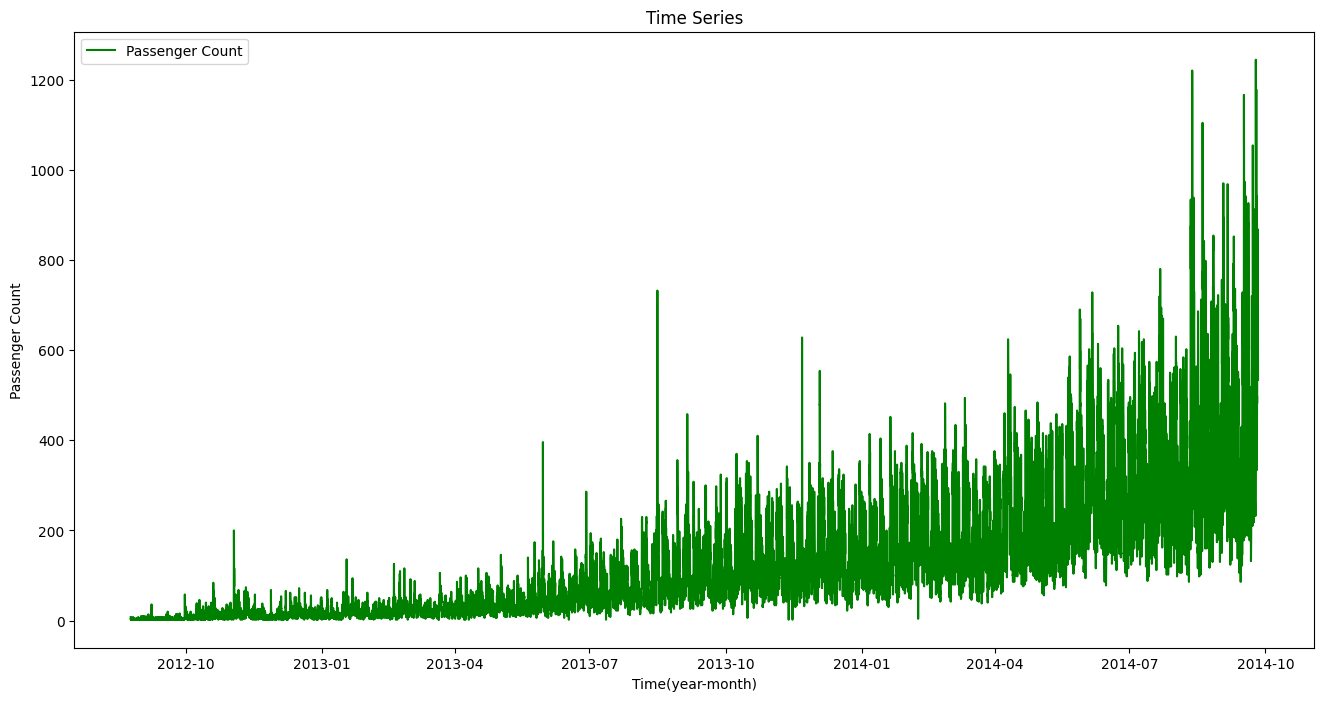

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(timeseris, label='Passenger Count', color="green")
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc="best")

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time.  
We can also see that at certain points there is a sudden increase in the number of counts.  
The plausible reason behind this could be that on particular day, due to some event the traffic was high. 

**Hyothesis 1:** Traffic will increase as the years pass by! 

In [20]:
grouped_by_year = train_set.groupby('year')['Count'].mean()

Text(0.5, 1.0, 'Average Number Of Passengers Per Year')

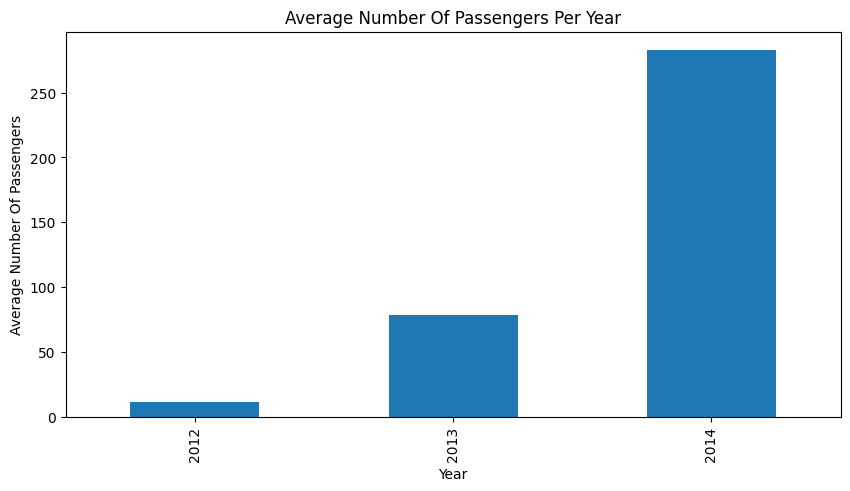

In [21]:
plt.figure(figsize=(10, 5))
grouped_by_year.plot(kind="bar")
plt.xlabel('Year')
plt.ylabel('Average Number Of Passengers')
plt.title('Average Number Of Passengers Per Year')

We see an exponential growth in the traffic with respect to year which validates our hypothesis!  

**Hypothesis 2**: Traffic will be high from May to October 

In [22]:
grouped_by_month = train_set.groupby('month')['Count'].mean()

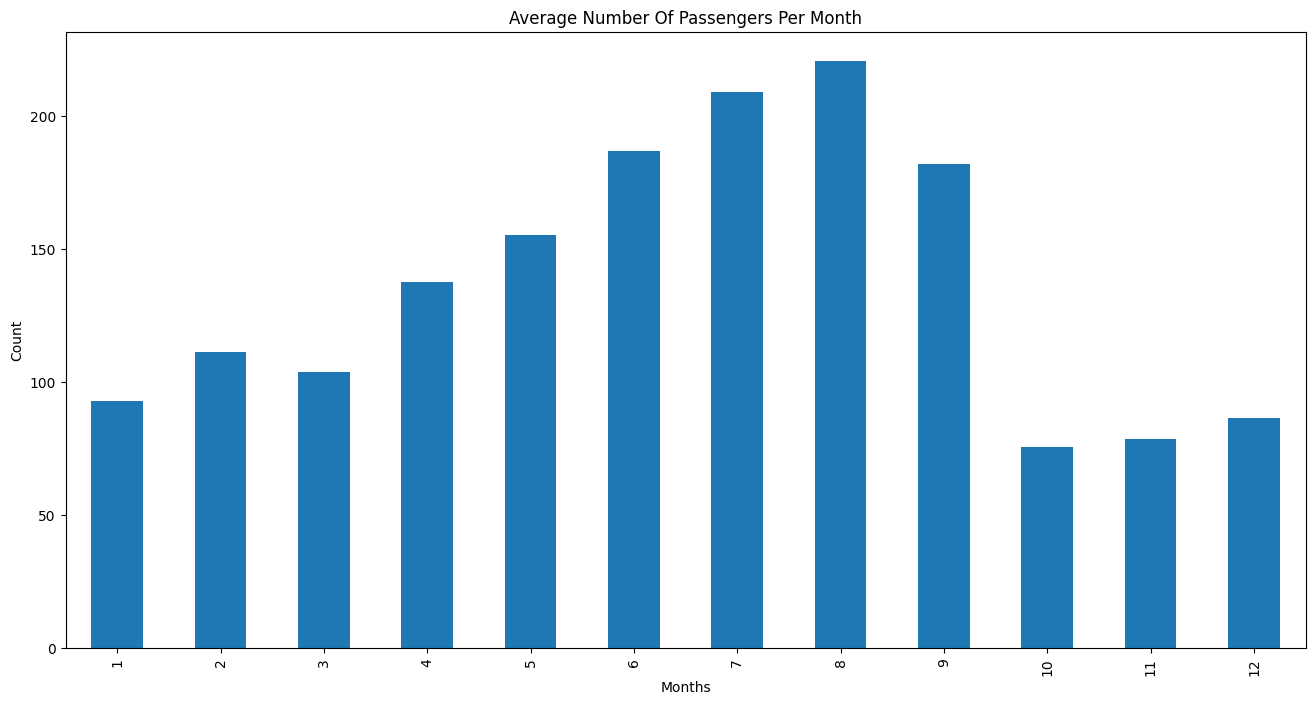

In [23]:
# The relationship between COUNT and MONTH
plt.figure(figsize=(16, 8))
grouped_by_month.plot(kind='bar')
plt.title("Average Number Of Passengers Per Month")
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

Here we see a decrease in the mean of passenger count in last three months.   
This **doesn't** look right.  
Let’s look at the monthly mean of each year separately.


In [24]:
grouped_by_year_month = train_set.groupby(['year', 'month'])['Count'].mean()

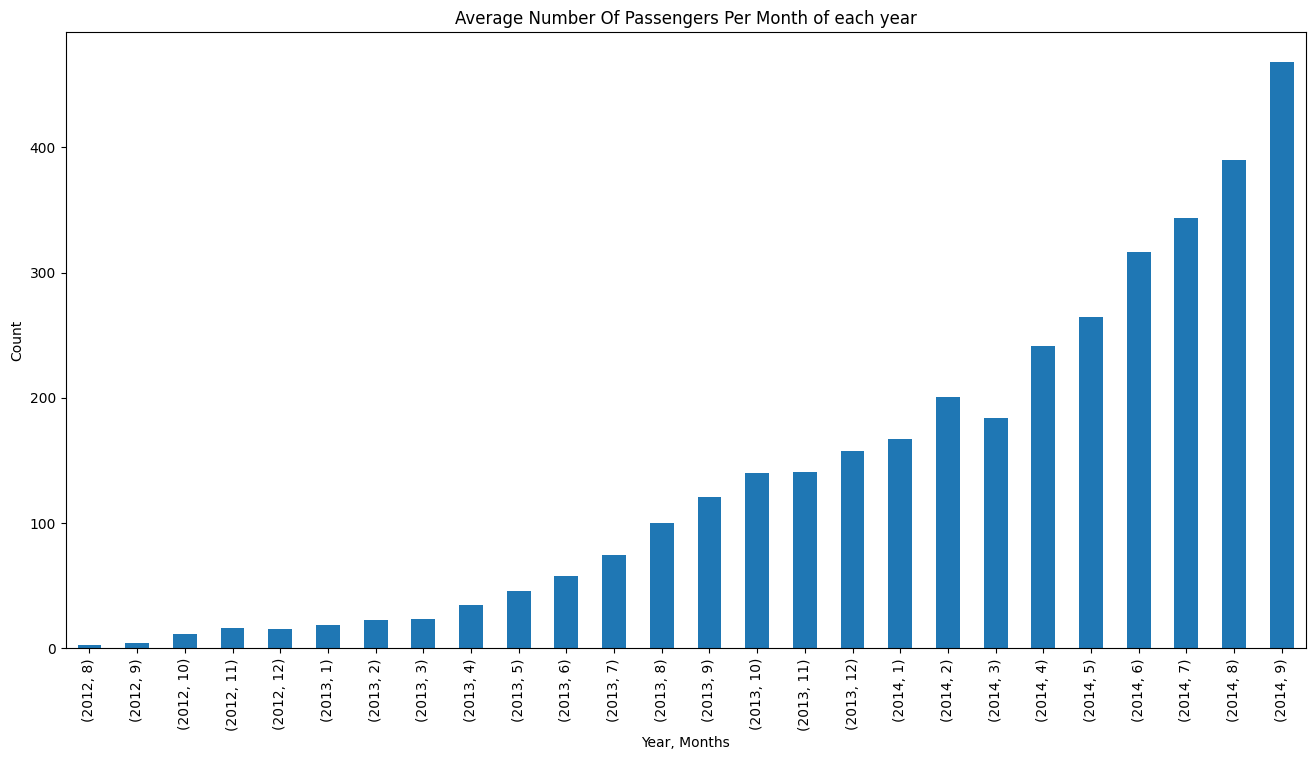

In [25]:
plt.figure(figsize=(16, 8))
grouped_by_year_month.plot(kind='bar')
plt.title("Average Number Of Passengers Per Month of each year")
plt.xlabel('Year, Months')
plt.ylabel('Count')
plt.show()

We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.  
Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.  
We can see an increasing trend in monthly passenger count and the growth is approximately exponential.  

**Hypothesis 3:**  Traffic on weekdays will be more as compared to weekends/holidays.  

In [26]:
grouped_by_weekend = train_set.groupby('weekend')['Count'].mean()

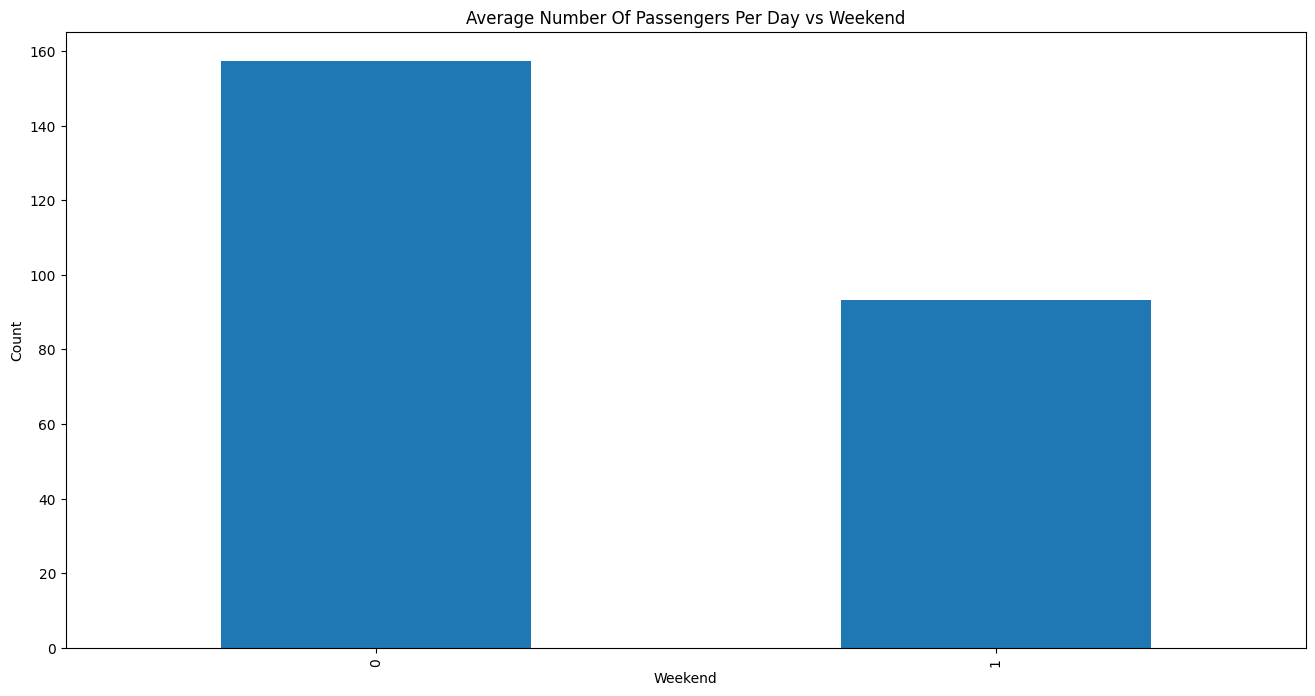

In [27]:
plt.figure(figsize=(16, 8))
grouped_by_weekend.plot(kind='bar')
plt.title("Average Number Of Passengers Per Day vs Weekend")
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.show()

* It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis. 

**Hypothesis 4** Traffic during the peak hours will be high

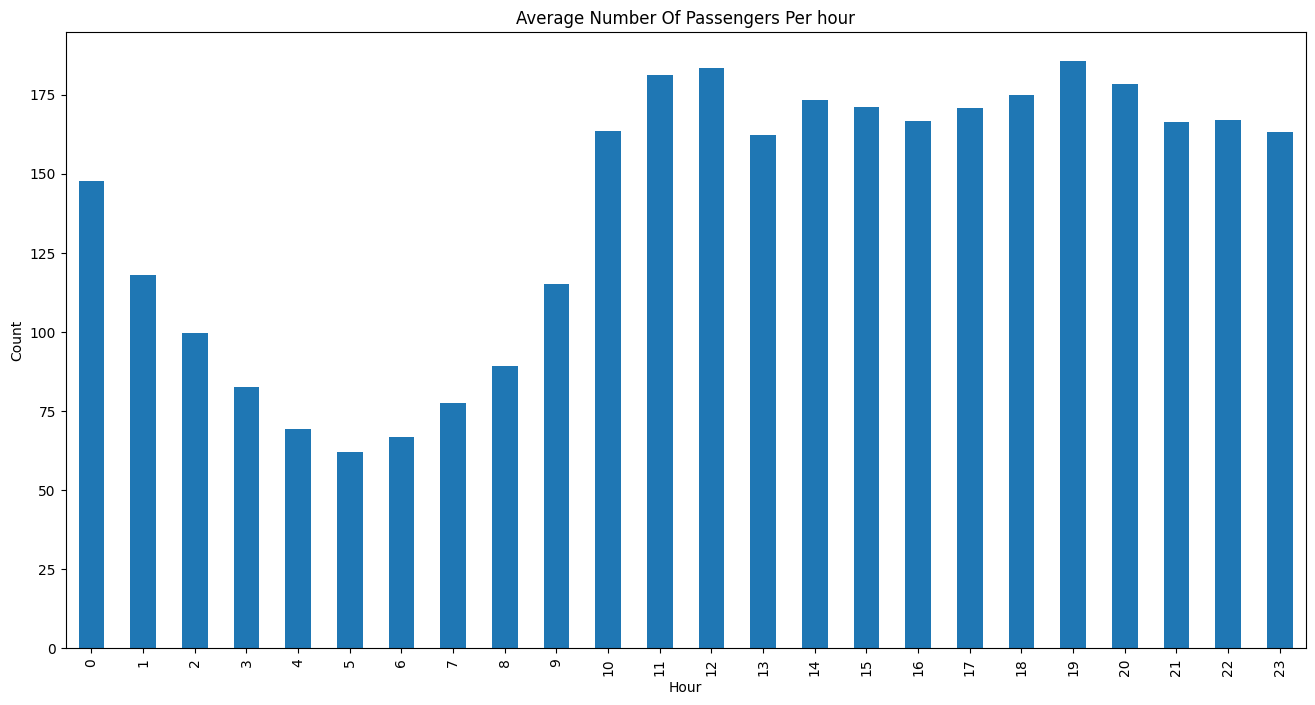

In [28]:
grouped_by_hour = train_set.groupby('hour')['Count'].mean()

plt.figure(figsize=(16, 8))
grouped_by_hour.plot(kind='bar')
plt.title("Average Number Of Passengers Per hour")
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

* It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.   
* After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon. 

In [29]:
grouped_by_day = train_set.groupby('day of week')['Count'].mean()

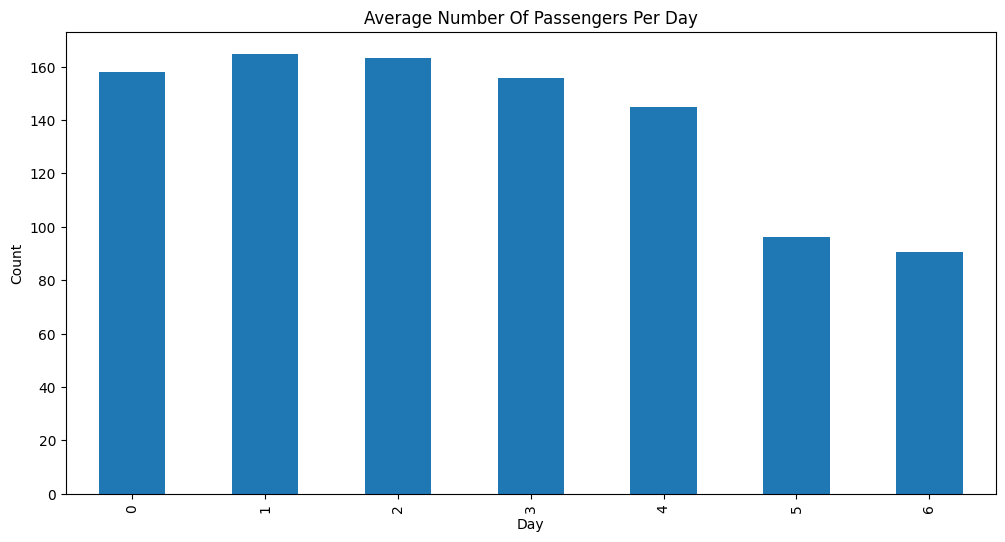

In [30]:
plt.figure(figsize=(12, 6))
grouped_by_day.plot(kind='bar')
plt.title("Average Number Of Passengers Per Day")
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.   
From the above bar plot, we can infer that the passenger count is less for Saturday and Sunday as compared to the other days of the week. 

### Data Prepration

In [31]:
# Droping the ID column.
train_set = train_set.drop('ID', axis=1)

In [32]:
train_set.head()

,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly,  
and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn. 

In [33]:
train_set["Timestamp"] = pd.to_datetime(train_set.Datetime, format="%d-%m-%Y %H:%M")

In [34]:
train_set.index = train_set['Timestamp']

In [35]:
# Hourly Time Series
hourly = train_set.resample('h').mean()
# Daily Time Series
daily = train_set.resample('D').mean()
# Converting to Weekly Mean
weekly = train_set.resample('W').mean()
# Monthly Time Series
monthly = train_set.resample('ME').mean()

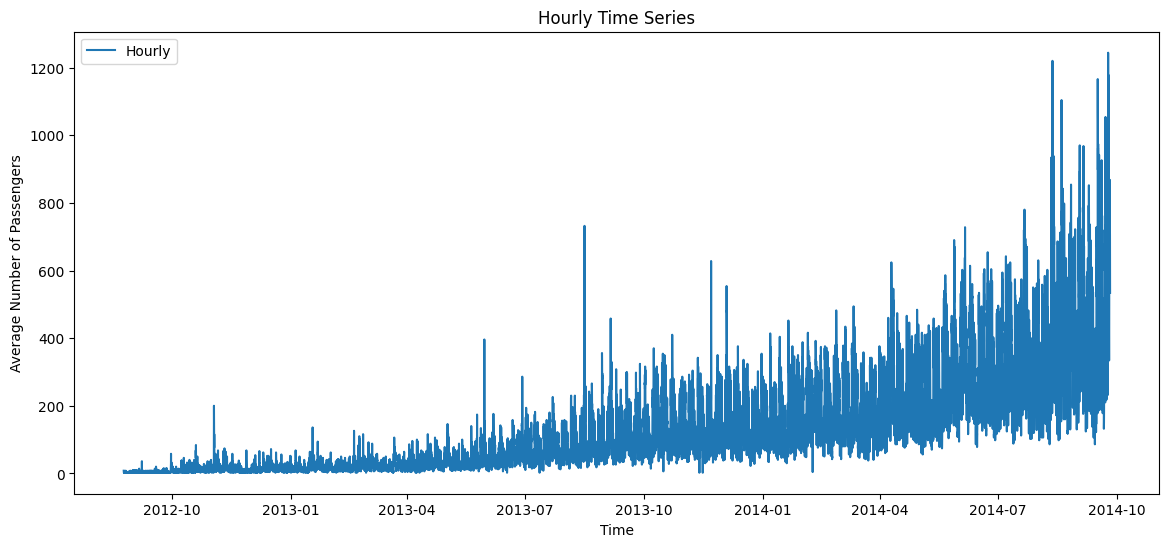

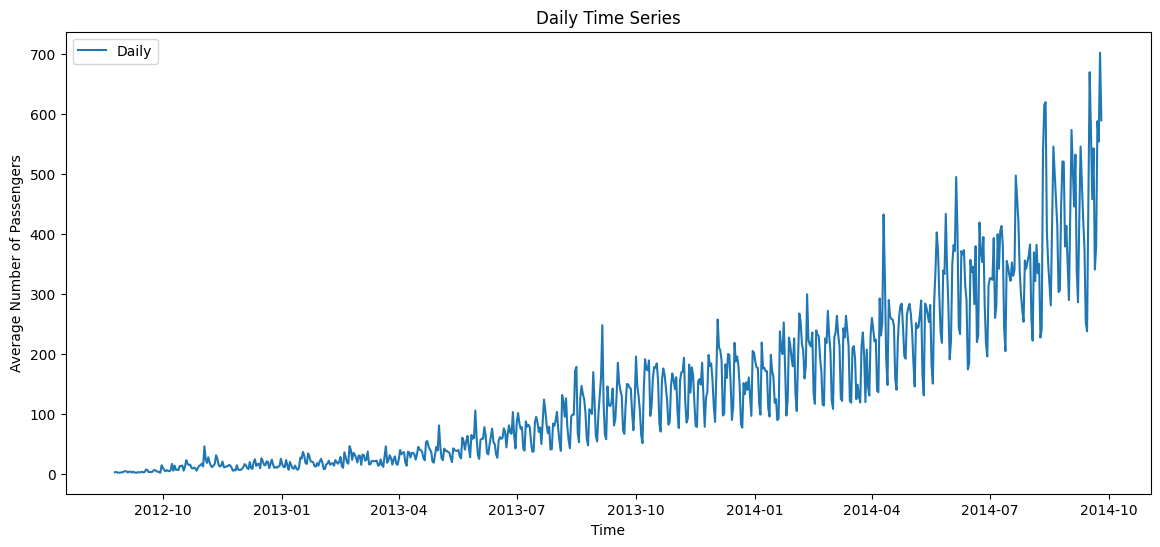

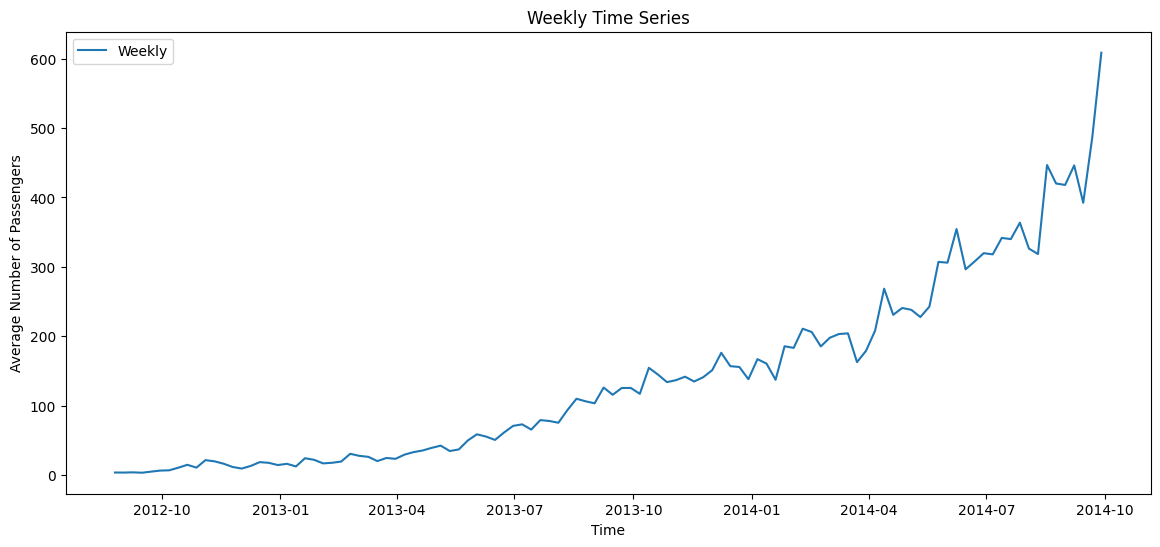

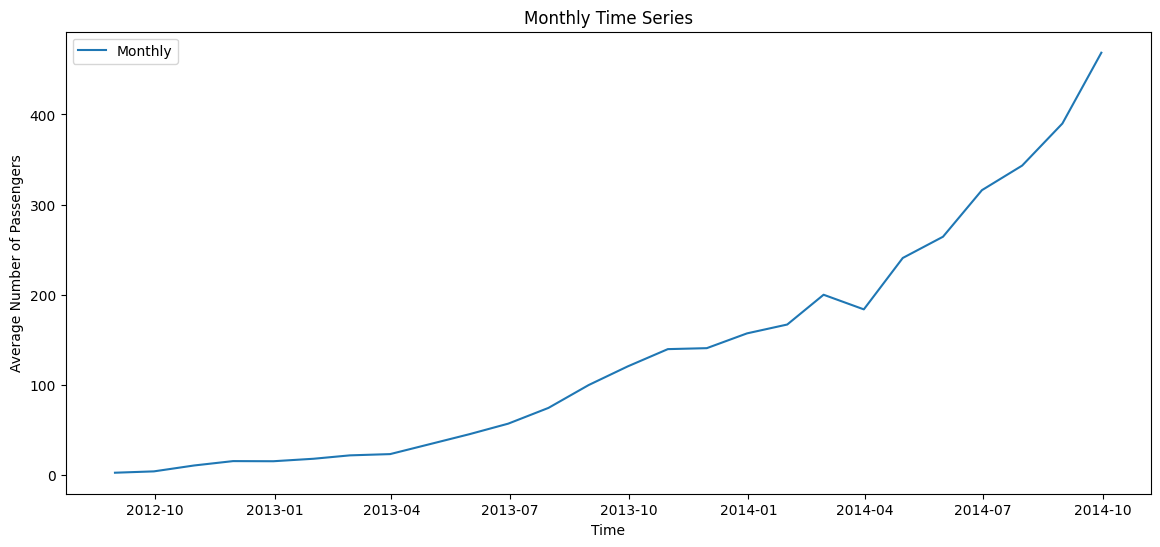

In [36]:
import matplotlib.pyplot as plt

# Visualizing Hourly Time Series
plt.figure(figsize=(14, 6))
plt.plot(hourly.index, hourly['Count'], label='Hourly')
plt.xlabel('Time')
plt.ylabel('Average Number of Passengers')
plt.title('Hourly Time Series')
plt.legend()
plt.show()

# Visualizing Daily Time Series
plt.figure(figsize=(14, 6))
plt.plot(daily.index, daily['Count'], label='Daily')
plt.xlabel('Time')
plt.ylabel('Average Number of Passengers')
plt.title('Daily Time Series')
plt.legend()
plt.show()

# Visualizing Weekly Time Series
plt.figure(figsize=(14, 6))
plt.plot(weekly.index, weekly['Count'], label='Weekly')
plt.xlabel('Time')
plt.ylabel('Average Number of Passengers')
plt.title('Weekly Time Series')
plt.legend()
plt.show()

# Visualizing Monthly Time Series
plt.figure(figsize=(14, 6))
plt.plot(monthly.index, monthly['Count'], label='Monthly')
plt.xlabel('Time')
plt.ylabel('Average Number of Passengers')
plt.title('Monthly Time Series')
plt.legend()
plt.show()

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly, and monthly basis.

We will need a dataset(validation) to check the performance and generalisation ability of our model. 
Below are some of the properties of the dataset required for the purpose.   
• The dataset should have the true values of the dependent variable against which the predictions can be checked. Therefore, test dataset cannot be used for the purpose.   
• The model should not be trained on the validation dataset. Hence, we cannot train the model on the train dataset and validate on it as well.   

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data.  
The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.  

In [37]:
train_set = train_set.sort_index()

In [38]:
# Assuming the data ends at '2014-09-25'
end_date = '2014-09-25'

# Calculate the start date for the validation set (3 months before the end date)
start_date = pd.to_datetime(end_date) - pd.DateOffset(months=3)

training_set = train_set.loc[:start_date]
validation_set = train_set.loc[start_date:]

print(f'Training set shape: {training_set.shape}')
print(f'Validation set shape: {validation_set.shape}')


Training set shape: (16057, 9)
Validation set shape: (2232, 9)


We have done time-based validation here by selecting the last 3 months for the validation data and rest in the train data.  
If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset. 

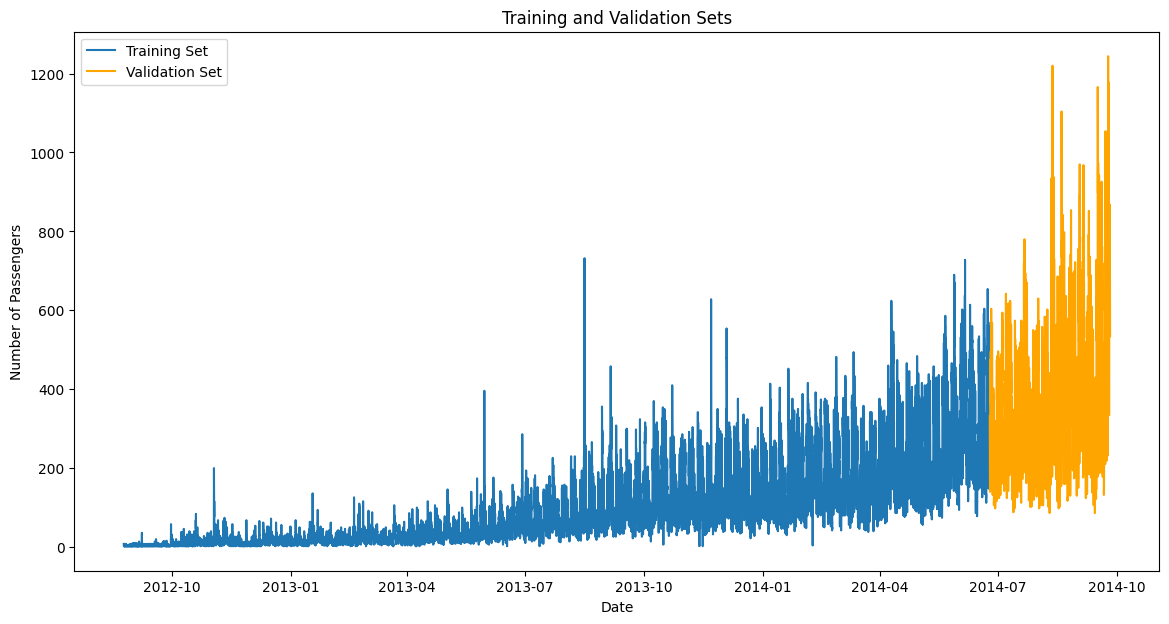

In [39]:
# Plotting both training and validation sets
plt.figure(figsize=(14, 7))
plt.plot(training_set.index, training_set['Count'], label='Training Set')
plt.plot(validation_set.index, validation_set['Count'], label='Validation Set', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Training and Validation Sets')
plt.legend()
plt.show()

### Modeling Techniques
#### Naive Approach
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So, we can expect a straight horizontal line as the prediction.

In [40]:
d = np.asarray(training_set['Count'])
y_hat = validation_set.copy()
y_hat['naive'] = d[len(d) - 1]

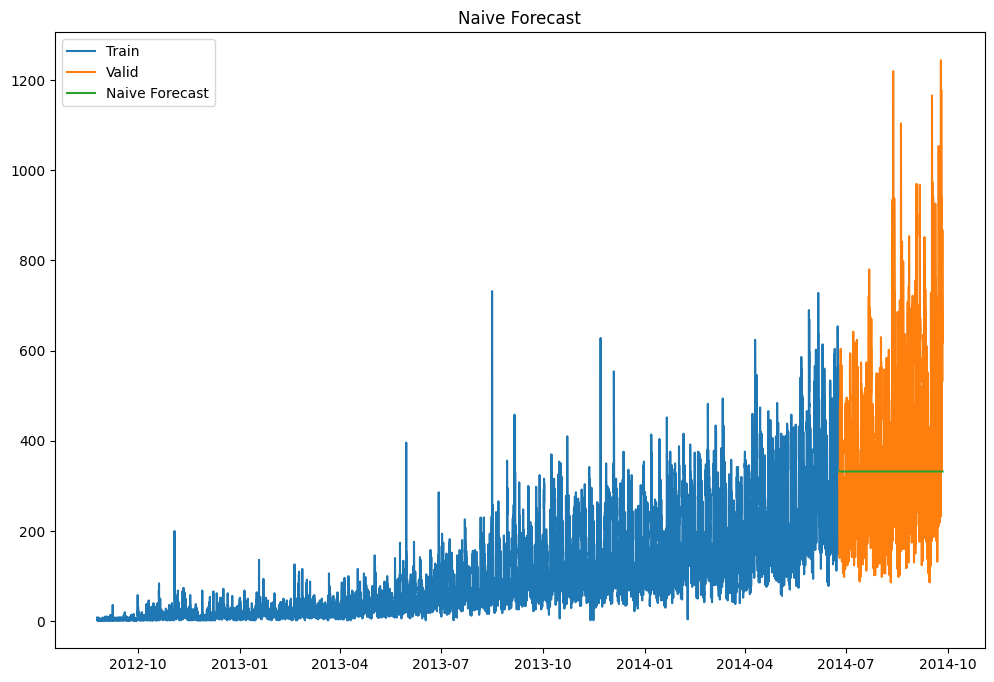

In [41]:
plt.figure(figsize=(12,8))  
plt.plot(training_set.index, training_set['Count'], label='Train')  
plt.plot(validation_set.index, validation_set['Count'], label='Valid')  
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')  
plt.legend(loc='best')  
plt.title("Naive Forecast")  
plt.show()

The green line is the prediction here. All the predictions are equal to the last observed point.  

* We can calculate how accurate our predictions are using RMSE (Root Mean Square Error). 
* RMSE is the standard deviation of the residuals. 
* Residuals are a measure of how far from the regression line data points are. 

#### Evaluating the naive model

In [42]:
# Assuming y_hat.naive contains the predictions and valid.Count contains the true values
true_values = validation_set['Count'].values
predictions = y_hat.naive.values

# Calculate the Mean Squared Error
mse = np.mean((true_values - predictions) ** 2)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 194.98064420065708


We can infer that this method is not suitable for datasets with high variability. We can reduce the RMSE value by adopting different techniques.

#### Moving Average Technique 
In this technique we will take the average of the passenger counts for last few time periods only.

In [43]:
y_hat_avg = validation_set.copy()  
y_hat_avg['moving_avg_forecast'] = training_set['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 

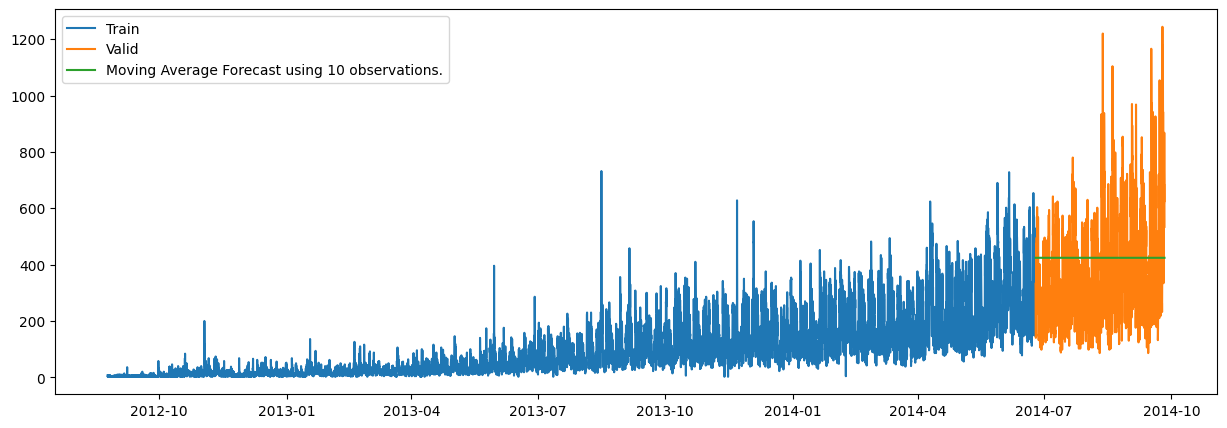

In [44]:
plt.figure(figsize=(15,5))  
plt.plot(training_set['Count'], label='Train')  
plt.plot(validation_set['Count'], label='Valid')  
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations.') 
plt.legend(loc='best') 
plt.show()

In [45]:
y_hat_avg = validation_set.copy()  
y_hat_avg['moving_avg_forecast'] = training_set['Count'].rolling(30).mean().iloc[-1] # average of last 30 observations. 

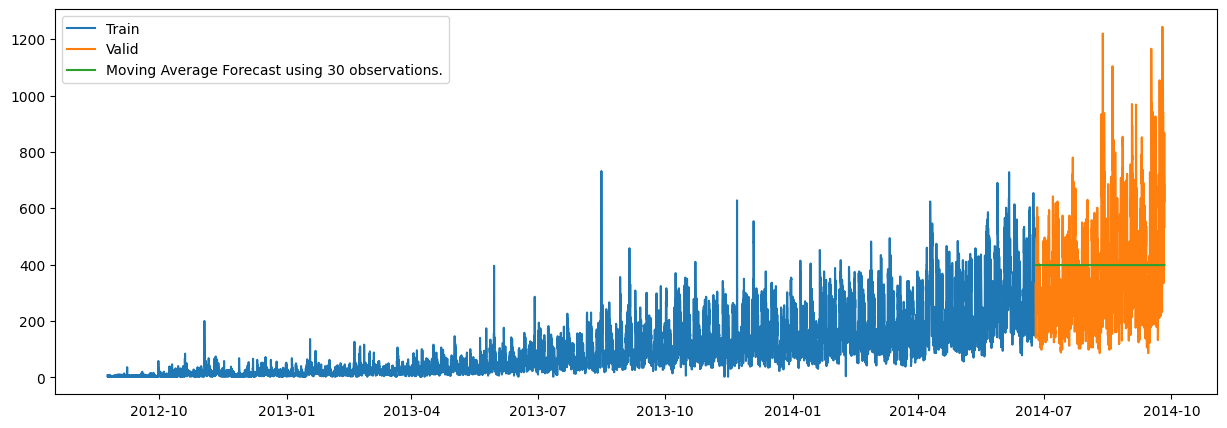

In [47]:
plt.figure(figsize=(15,5))  
plt.plot(training_set['Count'], label='Train')  
plt.plot(validation_set['Count'], label='Valid')  
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 30 observations.') 
plt.legend(loc='best') 
plt.show()

We took the average of last 10, and 30 observations and predicted based on that.  
This value can be changed in the above code in **.rolling().mean()** part. We can see that the predictions are **getting weaker** as we increase the number of observations. 